# Mini projet : Systèmes dynamiques & Méthodes numériques pour l'ingénieur




#<u>Titre du projet</u> : Modélisation de la croissance tumorale en utilisant le modèle de Gompertz

### <u>Membres du projet</u>:
  1. **BADOLO** Christian Thomas : algorithmes de résolution du système dynamique, programmation 'propre' comparaison entre les deux méthodes, saisie sous colab
  2. **NIAMPA** Soumaïla : Description du phénomène étudié, problématique abordée et mise en équation, Bifurcation
  3. **SEBEOGO** Landry Yves Joël : Étude de l'existence et de l'unicité de la solution, Étude de la stabilité des points fixes, Implémentation des algorithmes de résolution avec odeint
  4. **YEBOUA** Franck : Schéma numérique, implémation et convergence, Bifurcation,Saisie sous colab
  5.**ZONGO** Sosthène : Traçage les portraits de phases, Bifurcation, Calcul de l'ensemble Omega-limite et étude l'existence de cycles limites

# <u> **0. Modélisation** </u>

$\hspace{1cm}$La croissance tumorale est un processus complexe et dynamique dans lequel des cellules cancéreuses se multiplient de manière désordonnée pour former une masse tumorale. Comprendre la dynamique de croissance tumorale est essentiel pour développer des stratégies de prévention, de diagnostic précoce et de traitement efficaces du cancer. La question centrale consiste à modéliser mathématiquement la croissance tumorale afin de mieux comprendre les mécanismes sous-jacents, d'évaluer l'efficacité des traitements et d'explorer de nouvelles approches thérapeutiques.

$\hspace{1cm}$Pour modéliser mathématiquement la croissance tumorale, nous établissons un système dynamique basé sur le modèle de $Gompertz$. En utilisant les notations suivantes :

- $V(t)$ : volume de la tumeur à un moment t donné
- $t$ : temps
- $k$ : constante de croissance tumorale
- $M$ : taille maximale théorique de la tumeur

Le système dynamique peut être formulé comme suit :

$\frac{dV(t)}{dt} = k \cdot V(t) \cdot \ln\left(\frac{M}{V(t)}\right)$

$\hspace{1cm}$Cette équation différentielle représente la variation du volume de la tumeur $V(t)$ par rapport au temps $t$. La vitesse de croissance de la tumeur à un instant donné est représentée par le terme $k \cdot V(t) \cdot \ln\left(\frac{M}{V(t)}\right)$. La fonction logarithmique naturelle $(ln)$ est utilisée pour modéliser le ralentissement progressif de la croissance tumorale à mesure que la tumeur atteint une taille plus importante.

$\hspace{1cm}$Le système dynamique ainsi formulé permet de décrire comment le volume de la tumeur évolue au fil du temps en fonction des paramètres de croissance $k$ et $M$. L'analyse de ce système dynamique fourni des informations sur la croissance tumorale, telles que la vitesse de croissance initiale, le temps nécessaire pour atteindre une certaine taille et la relation entre la taille de la tumeur et la vitesse de croissance.

# <u>1. **Etude théorique**</u>

- <u>**Existence**</u>

Posons $f(V,t) = kV\ln\left(\frac{M}{V}\right)$

Pour tout $(V,t) \in ]0,+\infty[ \times [t,+\infty[$, $f$ est continue, $V$ est de classe $C^1$. D'après le théorème de $Peano$, une solution existe.

- <u>**Unicité**</u>

Soit $V_1, V_2$ $\in ]0,+\infty[^2$, tels que $V_1 < V_2$. On a :

\begin{align*}
    f(V_1,t) - f(V_2,t) &= kV_1\ln\left(\frac{M}{V_1}\right) - kV_2\ln\left(\frac{M}{V_2}\right) \\
    &= k(V_1(\ln M - \ln V_1) - V_2(\ln M - \ln V_2)) \\
    &= k(V_1 - V_2)\ln M - k(V_1\ln V_1 - V_2\ln V_2)
\end{align*}


$|f(V_1,t) - f(V_2,t)| \leq k|V_1 - V_2|\ln M$ car $k(V_1\ln V_1 - V_2\ln V_2) > 0$

Il en est de même si $V_1 > V_2$

$f$ est lipschitzienne par rapport à la seconde variable $V$ d'où l'unicité de la solution.


  - <u>**Etudier la dépendance continue par rapport à la condition initiale et la lois (la fonction f)**</u>

  La dépendance continue de la solution par rapport à la condition initiale et à la fonction $f$ est assurée par le théorème de Cauchy-Lipschitz. En effet$f$ étant continue et lipschitzienne le théorème de Cauchy-Lipschitz assure que de petites variations dans la condition initiale ou dans la fonction $f$ entraîneront de petites variations dans la solution.
  
  - <u>**Etudier la stabilité des points fixes**</u>

Un état déquilibre est atteint lorsque la tumeur n'évolue plus. Les points d'équilibres sont les valeurs $V^*$ pour les quelles $\frac{dV(t)}{dt} = 0$

Soit $V(t)\ln\left(\frac{M}{V(t)}\right) =0$

Deux solutions sont possibles: soit $kV(t)=0$ soit $\ln\left(\frac{M}{V(t)}\right) =0$

* Pour le permier point $V^*_1$:

$kV(t)=0, k \neq 0\Leftrightarrow V(t) = 0$

* Pour le deuxième point $V^*_2$:

$k.V(t)\ln\left(\frac{M}{V(t)}\right) =0 \Leftrightarrow \left(\frac{M}{V(t)}\right) =1 \Leftrightarrow V(t) = M$


  
Au point d'équilibre $V^*_1 = 0$, on a $\frac{df}{dV}$ non défini car $\ln(0)$ n'existe pas, mais $\lim_{V\to 0} \frac{df}{dV} = +\infty > 0$ $\Longrightarrow$ $V^*_1$ est instable.

Au point d'équilibre $V^*_2 = M$, on a $\frac{df}{dV} = -k ≤ 0$, donc $V^*_2$ est asymptotiquement stable.


- <u>**On a les portraits de phases suivant**</u>



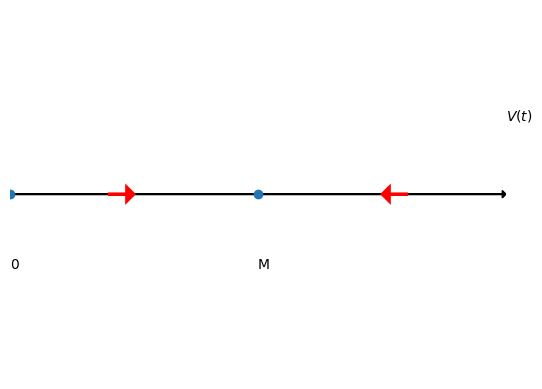

In [ ]:
import matplotlib.pyplot as plt
# Création de la figure et des axes
fig, ax = plt.subplots()
# Tracé initial
ax.set_xlim(-1, 1)
ax.set_ylim(-0.25, 0.25)
ax.axis('off')
# Ajout du texte
ax.text(1, 0.1, r'$V(t)$')
# Tracé des flèches
ax.arrow(-1, 0, 2, 0, length_includes_head=True, head_width=0.01, color='black')
# Tracé des points
ax.scatter([-1, 0], [0, 0], marker='o')
# Ajout du texte supplémentaire
ax.text(-1, -0.1, '0')
ax.text(0, -0.1, 'M')
# Tracé des flèches rouges
ax.arrow(-0.6, 0, 0.1, 0, length_includes_head=True, head_width=0.02, color='red', linewidth=2)
ax.arrow(0.6, 0, -0.1, 0, length_includes_head=True, head_width=0.02, color='red', linewidth=2)
# Affichage du graphique
plt.show()


  - <u> **L’ensemble Omega-limite** </u>

 $\hspace{1cm}$Le système suivant ne contient que deux points d'équilibre dont un seul point asymptotiquement stable.

 $\hspace{1cm}$Par définition du point asymptotiquement stable l'ensemble limite est ce point en l'occurence $M$.


- <u>**Etudions l’existence de cycle limite**</u>

Il n'y a pas de périodicité de la fonction $f$ il peut donc pas avoir de cycle limite


 - <u>**Bifurcation** </u>

Soit $f(V,t) = k(V+c)\ln\left(\frac{M}{V+c}\right) $

- <u>**Existence**</u>

$f$ reste continue pour tout $(V,t,c)$

* Unicité
De la même façon le fait que $f$ reste lipschitzienne assure l'unicité de la solution

<u>1. Points d'équilibre </u>

Pour trouver les points d'équilibre, nous devons résoudre l'équation $f(V, t) = 0$ :

$k(V+c)\ln\left(\frac{M}{V+c}\right) = 0$

Cela peut se produire dans trois cas :

   a) $V + c = 0$ : Dans ce cas, le point d'équilibre est $V = -c$, à condition que $-c$ ne soit pas négatif $c \geq 0$.

   b) $V + c \neq 0$ et $\frac{M}{V+c} = 1$ : Cela se produit lorsque $V + c = M$. Ainsi, le point d'équilibre est $V = M - c$, à condition que $M - c$ ne soit pas négatif $c \leq M$.

   c) $k = 0$ : Dans ce cas, le point d'équilibre est indéterminé.

<u>2. Stabilité des points d'équilibre</u>

Pour analyser la stabilité des points d'équilibre, nous devons étudier le comportement des valeurs de V autour de ces points en fonction de petites perturbations.

   a) $V = -c$ : Si $-c \geq 0$, alors $V = -c$ est stable, car une perturbation positive de V l'éloignera du point d'équilibre, qui ne peut pas être négatif.

   b) $V = M - c$ : Si $M - c \geq 0$, alors $V = M - c$ est stable, car une perturbation positive de V le rapprochera du point d'équilibre, qui ne peut pas être négatif.

En résumé, en tenant compte du fait que $K$, $V$ et $M$ ne peuvent pas être négatifs, nous avons les conclusions suivantes :

- Si $c \geq 0$ et $M - c \geq 0$ :
   - $V = -c$ est stable.
   - $V = M - c$ est stable.

- Si $c < 0$ ou $M - c < 0$ :
   - Les points d'équilibre ne sont pas valides et ne correspondent pas à des situations physiques réalistes.

   - <u>Conclusion</u>  
   On obtient dans ces cas les mème portrait de phase.


#<u> **2. Analyse numérique** </u>

- <u>Schéma numérique </u>

Pour résoudre numériquement l'équation différentielle $\frac{dV(t)}{dt} = k \cdot V(t) \cdot \ln\left(\frac{M}{V(t)}\right)$, nous utilisons une méthode de discrétisation : la méthode d'Euler explicite.
Le modèle de Gompertz peut être utilisé pour capturer les effets de retard dans la croissance tumorale. Le schéma d'Euler explicite est bien adapté pour prendre en compte ces retards en utilisant les valeurs de $V[n]$ à chaque pas de temps pour calculer $V[n+1]$, ce qui permet de modéliser la croissance tumorale de manière progressive au fil du temps.


SOit $\Delta t$ le pas de temps et$N$ le nombre d'itérations .

Initialisons $V[0] = V_0$ pour la condition initiale.

Calculer $V[n+1] = V[n] + \Delta t \cdot k \cdot V[n] \cdot \ln(M/V[n])$

- <u>Convergence du schéma numérique </u>

* Stabilité:  
On a
$V[n+1] = V[n] + \Delta t \cdot f(Δt,V[n])$
$f$ est lipschitzienne par rapport à la seconde variable $V$ qui assure la stabilite du schema.
* Consistant:  
Le schéma d'Euler peut etre ecrire de la façon suivante:
$V[n+1] = V[n] + \Delta t \cdot ϕ(Δt,V[n],h)$;  
Pour tous h , spéfiquement pour $h=0$ , on a:  
$ϕ(Δt,V[n],0)=f(Δt,V[n])$; donc le schema est consistant.

CONCLUSION: Le schéma est stable et consistant donc converge.


# 3. Implémentation

In [ ]:
#Importation des différentes bibliothèques
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import time

In [ ]:
#Resolution du problème avec odeint
def solver_python(V0, k, M, t_start, t_end, N):
    t = np.linspace(t_start, t_end, N)
    V = odeint(lambda V, t: k * V * np.log(M / V), V0, t)
    return V

In [ ]:
#Resolution du problème avec le schéma d'Euler explicite
def solver_euler(V0, k, M, dt, N):
    V = np.zeros(N)
    V[0] = V0
    for n in range(N-1):
        V[n+1] = V[n] + dt * k * V[n] * np.log(M / V[n])
    return V

In [ ]:
#Solution réelle
def V(t, V0, M, k):
    return M * np.exp(np.log(V0/M) * np.exp(-k*t))

In [ ]:
#Calcul de l'erreur
def error(true_data, computed_data):
    error = np.abs(true_data - computed_data)
    return error

#Estimation du temps d'exécution
def execution_time(code_function, *args):
    start_time = time.time()
    result = code_function(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

In [ ]:
##Comparaison des deux methodes de resolution
V0 = 0.1
k = 0.1
M = 1.0
dt = 0.01
N = 100
# Exécution et mesure du temps pour la deuxième methode
t_start = 0.0
t_end = dt * N
result_2, time_2 = execution_time(solver_python, V0, k, M, t_start, t_end, N)
# Exécution et mesure du temps pour la premiere methode
result_1, time_1 = execution_time(solver_euler, V0, k, M, dt, N)
# Calcul de l'erreur entre les résultats
error_value = error(result_2, result_1)
print("Temps d'exécution euler : ", time_1)
print("Temps d'exécution odeint : ", time_2)
print("Erreur entre les résultats : ", error_value)

Temps d'exécution euler :  0.0004162788391113281
Temps d'exécution odeint :  0.0004982948303222656
Erreur entre les résultats :  [[0.00000000e+00 2.30258509e-04 4.60816685e-04 ... 2.37061926e-02
  2.39647195e-02 2.42235279e-02]
 [2.32737319e-04 2.47881008e-06 2.28079366e-04 ... 2.34734553e-02
  2.37319822e-02 2.39907906e-02]
 [4.65780518e-04 2.35522009e-04 4.96383304e-06 ... 2.32404121e-02
  2.34989390e-02 2.37577474e-02]
 ...
 [2.39746130e-02 2.37443545e-02 2.35137963e-02 ... 2.68420341e-04
  9.89345677e-06 2.48914912e-04]
 [2.42361903e-02 2.40059318e-02 2.37753736e-02 ... 5.29997630e-04
  2.71470746e-04 1.26623770e-05]
 [2.44980546e-02 2.42677961e-02 2.40372379e-02 ... 7.91861944e-04
  5.33335059e-04 2.74526690e-04]]


On constate que les differents erreurs sont relativents faibles.

# 4.  Présentation des résultats et discussion


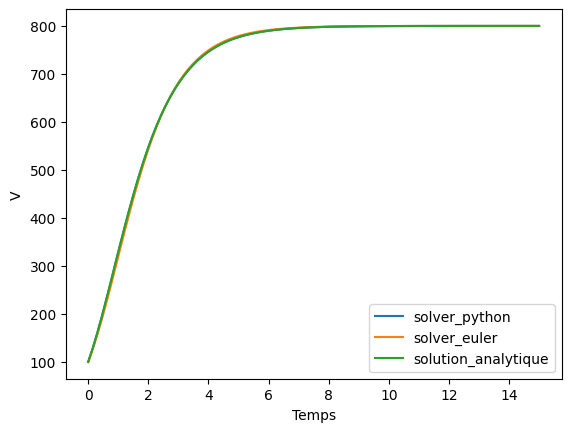

In [ ]:
# Paramètres pour les deux solveurs
V0 = 100
k = 0.85
M = 800
t_start = 0.0
t_end = 15
N = 100
dt = (t_end - t_start) / N

#Intervalle de temps
t = np.linspace(t_start, t_end, N)

# Appel des solveurs
V_python = solver_python(V0, k, M, t_start, t_end, N)
V_euler = solver_euler(V0, k, M, dt, N)
V_analytique = V(t, V0, M, k) #Solutoion réelle
# Tracé des courbes
plt.plot(t, V_python, label='solver_python')
plt.plot(t, V_euler, label='solver_euler')
plt.plot(t, V_analytique, label = 'solution_analytique')
plt.xlabel('Temps')
plt.ylabel('V')
plt.legend()
plt.show()


$\hspace{1cm}$La courbe de modélisation présente une phase initiale de croissance exponentielle, suivie d'un ralentissement progressif de la croissance et finalement d'un plateau asymptotique. Ces phases représentent respectivement une croissance tumorale rapide, un effet de régulation intrinsèque et une limite à la croissance tumorale. L'interprétation de la courbe permet de comprendre les différentes phases de la croissance tumorale et peut avoir des implications pour les interventions thérapeutiques.
L'utilisation du schéma d'Euler permet de suivre l'évolution de la croissance tumorale sur une durée plus longue, en déterminant le volume de la tumeur à des instants réguliers. Cela peut fournir des informations sur la croissance tumorale à long terme et aider à analyser les tendances et les caractéristiques du phénomène.
Le modèle utiliser permet de décrire l'évolution en temps continue, de même le schéma utilisé fournit des erreurs relativement faibles.

Aussi notre projet aurait dû être assez complet si nous avions eu accès à des données réels de patients. Malheureusement, toutes nos tentatives pour avoir accès à des datasets réels se sont avérées un echec.Néanmoins notre modèle fournit une bonne aproximation au vue des erreurs relativement faible obtenus par rapport à Odeint.
